In [31]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.regrassion import *
from helper.util import *
from helper.plot import *
from helper.analysis import *


### [2] 데이터 가져오기

중고차 가격 예측을 위한 데이터 세트

https://www.kaggle.com/datasets/rishabhkarn/used-car-dataset

| 변수명 | 설명 |
|:--:|--:|
| car_name | Name of the car |
| registration_year | Vehicle registration year |
| insurance_validity | Type of insurance |
| fuel_type | Type of fuel |
| seats | Number of seats in the car |
| kms_driven | Total kms driven |
| ownsership | Number of ownership |
| transmission | Transmission mode |
| manufacturing_year | manufacturing year |
| mileage(kmpl) | Mileage of the car |
| engine(cc) | Engine capacity |
| max_power(bhp) | max power |
| torque(Nm) | torque |
| price(in lakhs) | Price of the used car |

In [32]:
origin = my_read_data("./res/Used_Car_Dataset.csv",info= False).drop('Unnamed: 0',axis=1)
df = origin.copy()
# del_num=[457,633,653,1299,935,916,463,1463,388,554,574]
# del_num.sort(reverse=True)
# for i in del_num:
#     df = df.drop(i,axis=0)
df=df.drop_duplicates()

In [33]:
brand = []
for i in df['car_name']:
    brand.append(i.split(' ')[1])
df['brand'] = brand
df['brand'].unique()

array(['Mercedes-Benz', 'Nissan', 'BMW', 'Kia', 'Skoda', 'Honda',
       'Hyundai', 'Tata', 'Renault', 'Ford', 'Jeep', 'MG', 'Maruti',
       'Audi', 'Toyota', 'Jaguar', 'Volkswagen', 'Mahindra', 'Volvo',
       'Land', 'Isuzu', 'Mitsubishi', 'Porsche', 'Datsun', 'Lexus',
       'Mini', 'Fiat', 'Lamborghini'], dtype=object)

In [34]:
A = []
A_ = []
for i in origin['registration_year'].unique():
    try : 
        int(i)
        A.append(i)
    except:A_.append(i)
# A, A_

In [35]:
origin['registration_year'].unique()

map_registration_year = {a:None for a in A}
for i in A_:
    map_registration_year[i] = i
map_registration_year['Third Party insurance'] = None
df['registration_year'] = df['registration_year'].map(map_registration_year)
# df['registration_year']

In [36]:
month_dict = {'Apr':4,
 'Aug':8,
 'Feb':2,
 'Dec':12,
 'Jan':1,
 'Jul':7,
 'Jun':6,
 'Mar':3,
 'May':5,
 'Nov':11,
 'Oct':10,
 'Sep':9}

In [37]:
month = []
year = []

for i in df['registration_year']:
    if i:
        try:
            month.append(month_dict[i[:3]])
            year.append(int(i[-2:]))
        except : 
            month.append(None)
            year.append(None)
    else:
        month.append(None)
        year.append(None)

In [38]:
df['month']=month
df['year']=year

In [39]:
origin['insurance_validity'].value_counts()
map_insurance_validity = {a:a for a in origin['insurance_validity'].unique()}
map_insurance_validity['Petrol'] = None
map_insurance_validity['Not Available'] = None
df['insurance_validity'] = df['insurance_validity'].map(map_insurance_validity)
df['insurance_validity']

0               Comprehensive
1               Comprehensive
2               Comprehensive
3               Comprehensive
4               Comprehensive
                ...          
1548            Comprehensive
1549    Third Party insurance
1550            Comprehensive
1551            Comprehensive
1552            Comprehensive
Name: insurance_validity, Length: 1133, dtype: object

In [40]:
origin['fuel_type'].value_counts()
map_fuel_type = {a:a for a in origin['fuel_type'].unique()}
map_fuel_type['CNG'] = None
map_fuel_type['5 Seats'] = None
df['fuel_type'] = df['fuel_type'].map(map_fuel_type)
df['fuel_type']

0       Petrol
1       Petrol
2       Diesel
3       Petrol
4       Petrol
         ...  
1548    Diesel
1549    Petrol
1550    Petrol
1551    Petrol
1552    Petrol
Name: fuel_type, Length: 1133, dtype: object

In [41]:
origin['seats'].value_counts()
map_seats = {a:a if a<10 else None for a in origin['seats'].unique()}
df['seats'] = df['seats'].map(map_seats)
df['seats']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
1548    5.0
1549    5.0
1550    5.0
1551    5.0
1552    5.0
Name: seats, Length: 1133, dtype: float64

In [42]:
origin['ownsership'].value_counts()
map_ownsership = {a:a if "Owner" in a else None for a in origin['ownsership'].unique()}
df['ownsership'] = df['ownsership'].map(map_ownsership)
df['ownsership']


0        First Owner
1        First Owner
2        First Owner
3        First Owner
4        First Owner
            ...     
1548     First Owner
1549            None
1550     First Owner
1551    Second Owner
1552     First Owner
Name: ownsership, Length: 1133, dtype: object

In [43]:
A = []
A_ = []
for i in origin['transmission'].unique():
    try : 
        A.append(int(i))
    except:A_.append(i)
origin['transmission'].value_counts()

Manual                 835
Automatic              668
2017                    28
2014                     5
2011                     3
2023                     2
2020                     2
2021                     2
2022                     2
Power Windows Front      2
2018                     2
2015                     1
2016                     1
Name: transmission, dtype: int64

In [44]:
map_transmission = {a:None for a in A}
for i in A_:
    map_transmission[i] = i
map_transmission['Power Windows Front']=None
df['transmission'] = df['transmission'].map(map_transmission)
df['transmission']

0       Automatic
1       Automatic
2       Automatic
3          Manual
4       Automatic
          ...    
1548    Automatic
1549          NaN
1550       Manual
1551       Manual
1552       Manual
Name: transmission, Length: 1133, dtype: object

In [45]:
A = []
A_ = []
for i in origin['manufacturing_year'].unique():
    try : 
        int(i)
        A.append(i)
    except:A_.append(i)
A, A_

(['2017',
  '2020',
  '2018',
  '2019',
  '2015',
  '2021',
  '2014',
  '2022',
  '2010',
  '2011',
  '2023',
  '2016',
  '2009',
  '2013',
  '2012',
  '2007'],
 ['Power Steering', 'Power Windows Front', 'Air Conditioner'])

In [46]:
map_manufacturing_year = {a:a for a in A}
for i in A_:
    map_manufacturing_year[i] = None
df['manufacturing_year'] = df['manufacturing_year'].map(map_manufacturing_year)
df['manufacturing_year']

0       2017
1       2020
2       2018
3       2019
4       2019
        ... 
1548    2020
1549    None
1550    2017
1551    2018
1552    2018
Name: manufacturing_year, Length: 1133, dtype: object

In [47]:
for i,v in enumerate(origin['mileage(kmpl)']):
    if v>100 : df['mileage(kmpl)'][i] = None
origin[['mileage(kmpl)']].value_counts()

mileage(kmpl)
18.90            56
1197.00          53
21.40            35
18.60            35
18.00            31
                 ..
19.02             1
23.80             1
23.70             1
14.74             1
3996.00           1
Length: 332, dtype: int64

In [48]:
max = 13519
min = 352

for i,v in enumerate(origin['engine(cc)']):
    if v < min or v > max : df['engine(cc)'][i] = None


In [49]:
df2 = my_set_category(df.dropna().drop('car_name',axis=1))
df2['price'] = df2['price(in lakhs)']
df2.drop('price(in lakhs)',axis=1,inplace=True)

df2.dtypes

registration_year     category
insurance_validity    category
fuel_type             category
seats                  float64
kms_driven               int64
ownsership            category
transmission          category
manufacturing_year    category
mileage(kmpl)          float64
engine(cc)             float64
max_power(bhp)         float64
torque(Nm)             float64
brand                 category
month                  float64
year                   float64
price                  float64
dtype: object

In [50]:
import numpy as np
a = (int(df2['year'].max())-np.array(df2['year']) ) *12 + 12 - df2['month']
df2['registration'] = a
df2['mileage'] = df2['mileage(kmpl)']
df2['engine'] = df2['engine(cc)']
df2['max_power'] = df2['max_power(bhp)']
df2['torque'] = df2['torque(Nm)']
df2['kms_driven2']=df2['kms_driven']**2
df2['registration2'] = df2['registration']**2
df2['torque2'] = df2['torque']**2
df2['max_power2'] = df2['max_power']**2
df2['engine2'] = df2['engine']**2
df2['mileage2'] = df2['mileage'] **2
df2['seats2'] = df2['seats']**2

In [51]:
df3 =df2.drop(['torque(Nm)','engine(cc)','max_power(bhp)','mileage(kmpl)','year','month','manufacturing_year','registration_year'],axis=1).drop(1277)
categories = [x for x in df3.columns if df3[x].dtypes == 'category']

In [52]:
for c in categories:
    tmp = df3[[c, 'price']]
    my_anova(tmp, hue=c, target='price')

pingouin.anova
+----+--------------------+---------+------+---------+---------+------------+-----------+
|    | Source             |      SS |   DF |      MS |       F |      p-unc |       np2 |
|----+--------------------+---------+------+---------+---------+------------+-----------|
|  0 | insurance_validity | 3487.36 |    3 | 1162.45 | 4.11447 | 0.00652406 | 0.0135145 |
|  1 | Within             |  254558 |  901 | 282.528 |     nan |        nan |       nan |
+----+--------------------+---------+------+---------+---------+------------+-----------+

statsmodels.anova.anova_lm
+-----------------------+------+----------+-----------+---------+------------+
|                       |   df |   sum_sq |   mean_sq |       F |     PR(>F) |
|-----------------------+------+----------+-----------+---------+------------|
| C(insurance_validity) |    3 |  3487.36 |   1162.45 | 4.11447 | 0.00652406 |
| Residual              |  901 |   254558 |   282.528 |     nan |        nan |
+---------------------

In [53]:
df_brand = df3[['brand','price']]
df_brand_name = df_brand.groupby('brand').mean().sort_values('price').reset_index()
map_brand = {}
for i,v in enumerate(df_brand_name['brand']):
    map_brand[v] = df_brand_name['price'][i]
df3['brand_value'] = df3['brand'].map(map_brand).astype('float64')

In [54]:
std_df = my_standard_scaler(df3.drop(['brand','ownsership'],axis=1), 'price')

In [55]:
dummy_df = my_dummies(std_df)
my_pretty_table(dummy_df.head())


+----+-----------+--------------+----------------+-----------+-----------+-------------+------------+---------------+-----------------+------------+--------------+-----------+------------+-----------+---------------+---------+----------------------------------+--------------------------------------------+-------------------------------+--------------------+-----------------------+
|    |     seats |   kms_driven |   registration |   mileage |    engine |   max_power |     torque |   kms_driven2 |   registration2 |    torque2 |   max_power2 |   engine2 |   mileage2 |    seats2 |   brand_value |   price |   insurance_validity_Third Party |   insurance_validity_Third Party insurance |   insurance_validity_Zero Dep |   fuel_type_Petrol |   transmission_Manual |
|----+-----------+--------------+----------------+-----------+-----------+-------------+------------+---------------+-----------------+------------+--------------+-----------+------------+-----------+---------------+---------+------

In [56]:
x_train, x_test, y_train, y_test = my_train_test_split(dummy_df, "price", test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((633, 20), (272, 20), (633,), (272,))

In [57]:
my_auto_linear_regrassion(dummy_df,'price')

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.663072 |
+----+-------------------+

+----+------------+---------------+--------------------+------------+------------------+--------+------------+---------+
|    | 종속변수   | 독립변수      |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |      t |   유의확률 |     VIF |
|----+------------+---------------+--------------------+------------+------------------+--------+------------+---------|
|  0 | price      | registration2 |            -3.0913 |      0.845 |           -0.159 | -3.657 |          0 | 1.03114 |
|  1 | price      | engine2       |             3.3892 |      1.062 |            0.014 |  3.191 |      0.002 | 2.05425 |
|  2 | price      | brand_value   |            10.9118 |      1.024 |            0.774 | 10.657 |          0 | 2.08505 |
+----+------------+---------------+--------------------+------------+------------------+--------+------------+---------+
𝑅^2(0.645), Adj.𝑅^2(0.639), F(107.341

LinearRegression(n_jobs=-1)

> 원데이터중 41.69%의 데이터가 삭제됨.(중복, 이상치 등)

In [58]:
# 0행렬이 포함되어있는경우 `LinAlgError: Singular matrix` 발생, 해결방법은 해당 행렬을 찾아서 삭제한다.
# 0행렬이 포함되지 않아도 다른 행렬의 선형연결에 종속인 행렬이 존재할 시 `Singular matrix`, 해결방법은 해당 열을 제외한 나머지 열들의 기울기가 해당 열의 기울기와 동일한지 확인하여 삭제하면 된다.

ignore = []
for i in x_train.columns:
    check = False
    for j in x_train[i]:
        check = check or j
        if check:
            break
    else:
        ignore.append(i)
    check = False
    for j in x_test[i]:
        check = check or j
        if check:
            break 
    else:
        ignore.append(i)
ignore

[]

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.671128 |
+----+-------------------+

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.664363 |     0.688442 |
| 평균절대오차(MAE)             |      5.04918 |      5.51568 |
| 평균제곱오차(MSE)             |      86.7129 |      107.833 |
| 평균오차(RMSE)                |      9.31197 |      10.3843 |
| 평균 절대 백분오차 비율(MAPE) |      71.3331 |      96.7371 |
| 평균 비율 오차(MPE)           |     -27.7507 |     -62.1502 |
+-------------------------------+--------------+--------------+

[학습곡선]


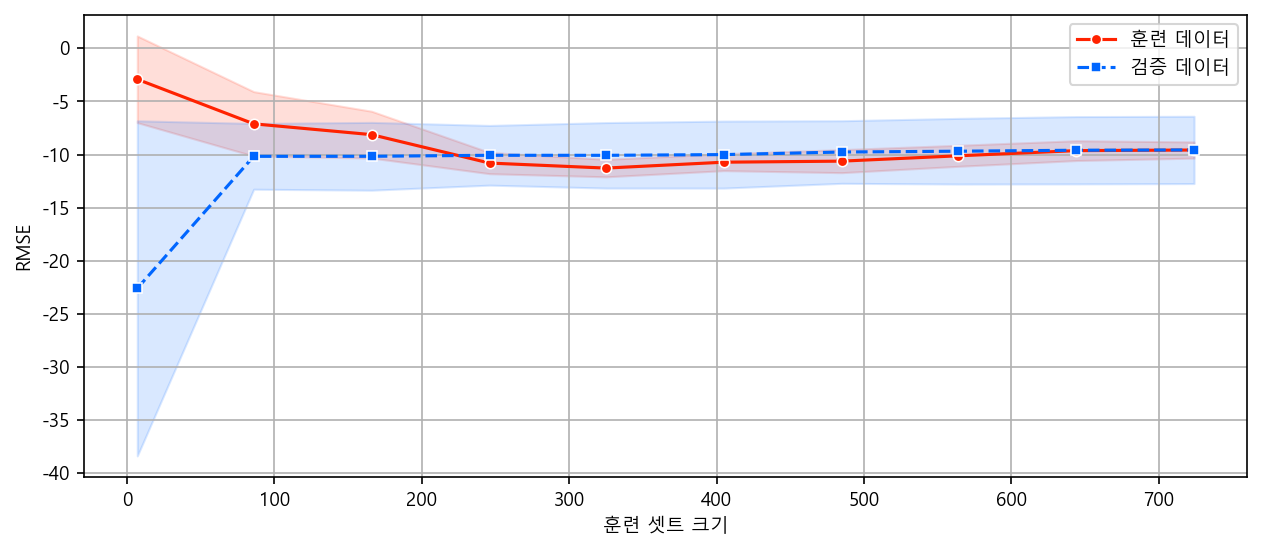


[회귀식]
price = -3.151 * registration2 + 2.109 * engine2 + -1.621 * mileage2 + 10.597 * brand_value + 14.157

[독립변수보고]
+----+------------+---------------+--------------------+------------+------------------+--------+------------+---------+
|    | 종속변수   | 독립변수      |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |      t |   유의확률 |     VIF |
|----+------------+---------------+--------------------+------------+------------------+--------+------------+---------|
|  0 | price      | registration2 |            -3.1514 |      0.678 |           -0.161 | -4.648 |          0 | 1.04831 |
|  1 | price      | engine2       |             2.1089 |      0.728 |            0.162 |  2.895 |      0.004 |   1.959 |
|  2 | price      | mileage2      |            -1.6208 |      0.752 |           -0.062 | -2.157 |      0.032 | 1.38276 |
|  3 | price      | brand_value   |            10.5967 |      0.791 |            0.648 | 13.397 |          0 | 1.87705 |
+----+------------+---------------+--------------------+------

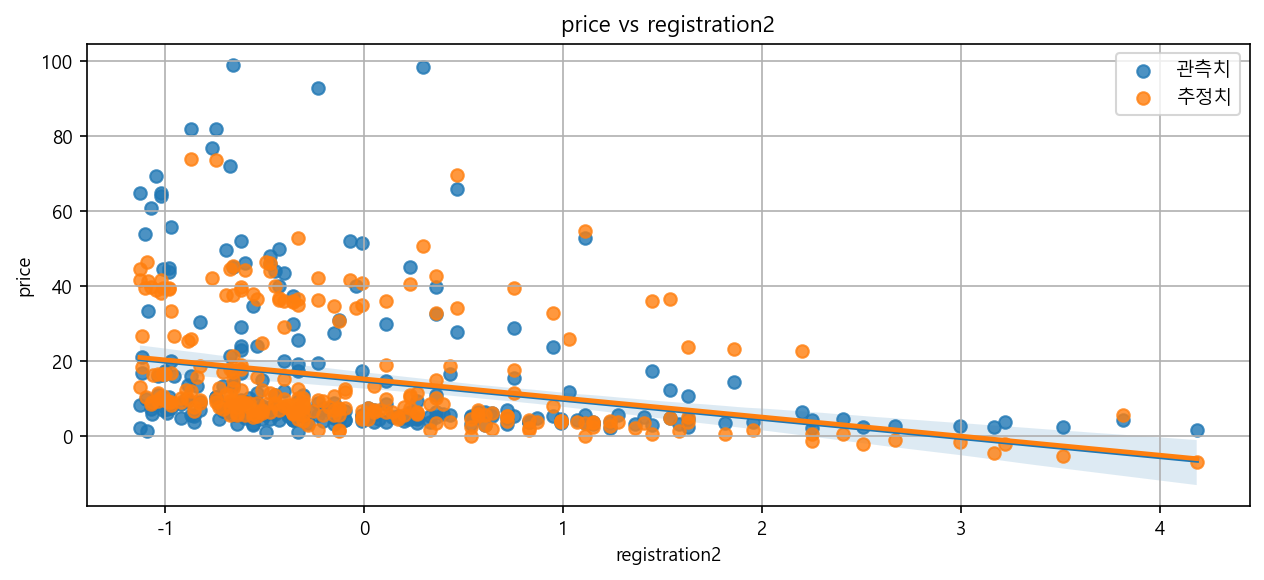

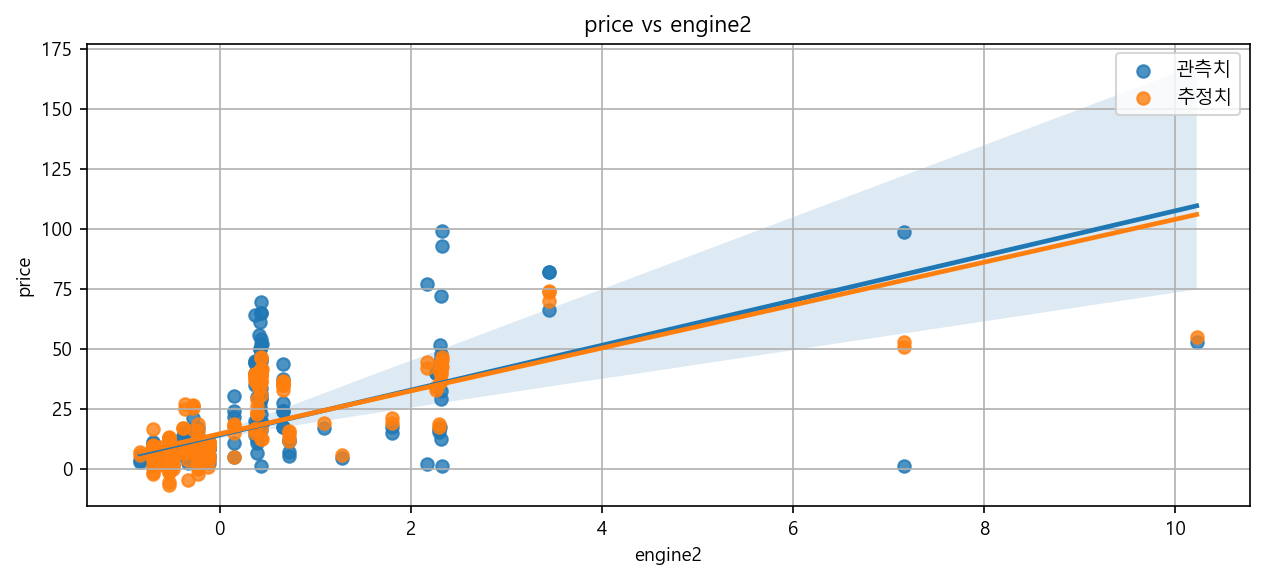

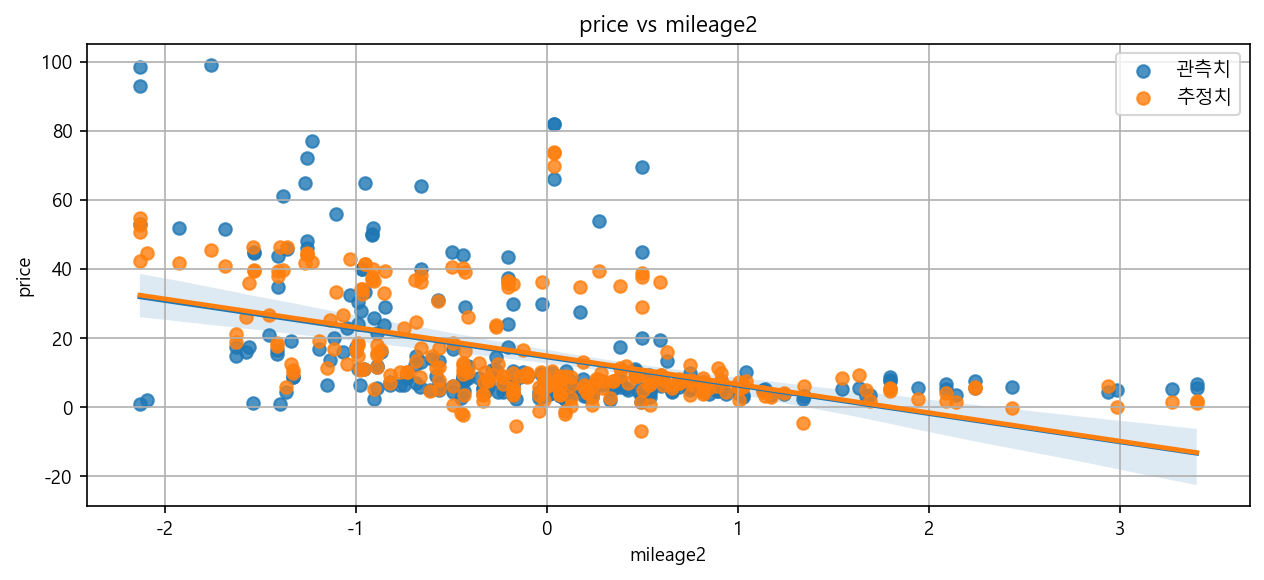

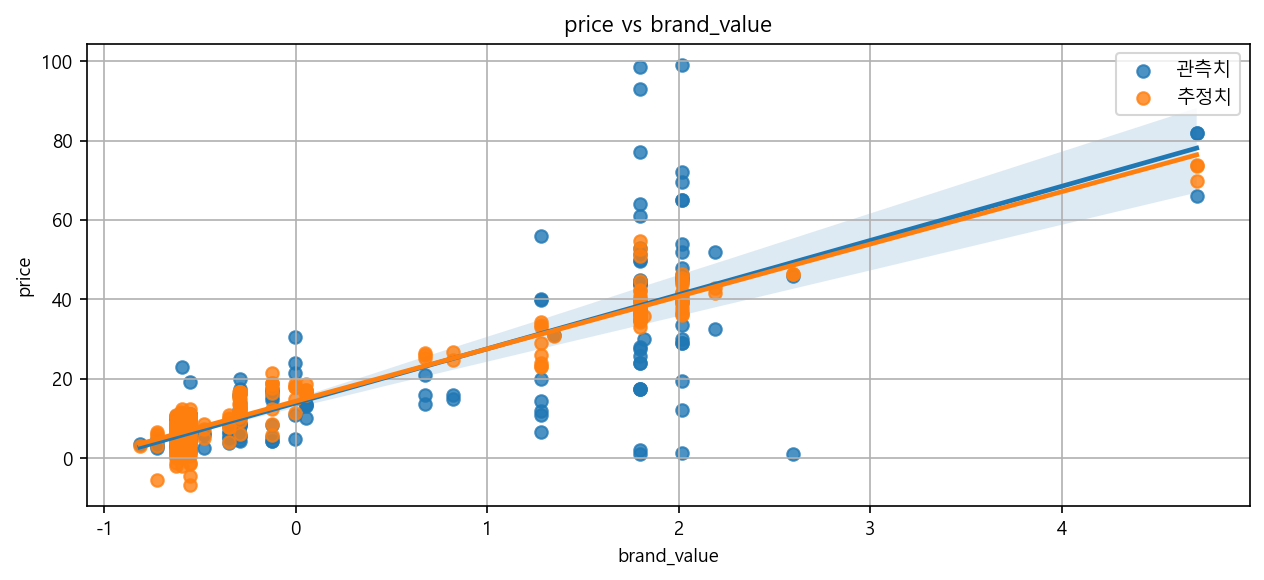



[잔차의 가정 확인] ==============================
[잔차의 선형성 가정]


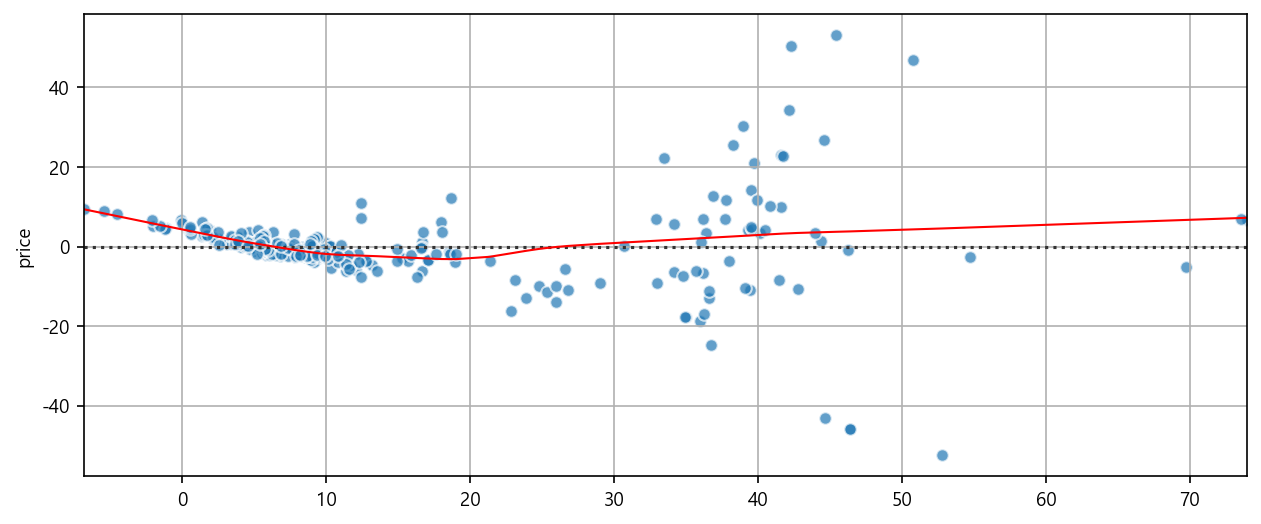


[잔차의 정규성 가정]


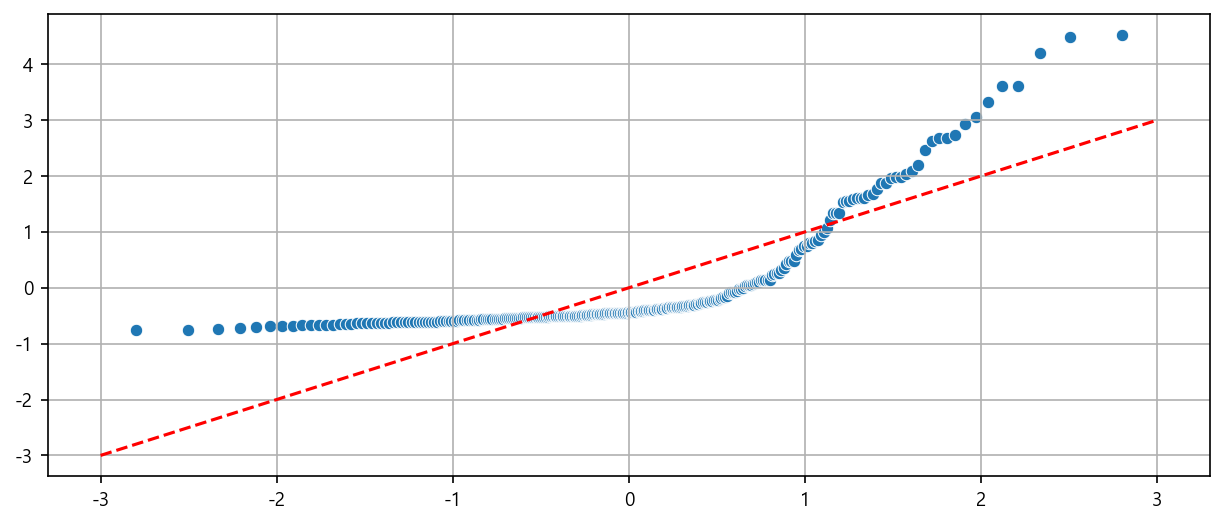

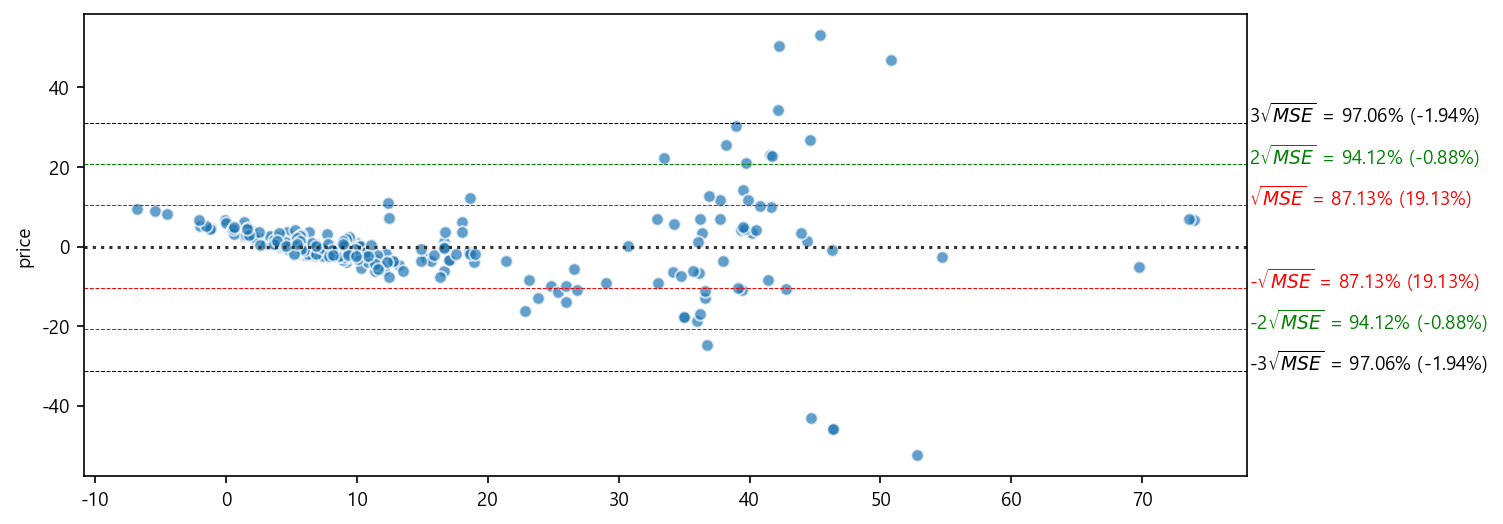

루트 1MSE 구간에 포함된 잔차 비율: 87.13% (19.132352941176478)
루트 2MSE 구간에 포함된 잔차 비율: 94.12% (-0.8823529411764781)
루트 3MSE 구간에 포함된 잔차 비율: 97.06% (-1.941176470588232)
잔차의 정규성 가정 충족 여부: False

[잔차의 등분산성 가정]
잔차의 등분산성 가정 충족 여부: False
+-----------+-------------+
|           |      values |
|-----------+-------------|
| statistic |     78.4332 |
| p-value   | 3.73988e-16 |
| f-value   |     27.0471 |
| f p-value | 7.47361e-19 |
+-----------+-------------+

[잔차의 독립성 가정]
Durbin-Watson: 2.128107635610589, 잔차의 독립성 가정 만족 여부: True


In [60]:
ignore1 = ignore  + ['engine','max_power2','seats2','mileage','max_power','torque2','registration','kms_driven2','insurance_validity_Third Party insurance','insurance_validity_Zero Dep','kms_driven','torque','transmission_Manual','fuel_type_Petrol','insurance_validity_Third Party','seats']
x_train2 = x_train.drop(ignore1,axis=1)
x_test2 = x_test.drop(ignore1,axis=1)
fit = my_linear_regrassion(x_train2, y_train, x_test2, y_test,plot=True,resid_test=True)


> registration2, engine2, brand_value, mileage2 
>
> 연식, 엔진, 브랜드, 연비로 예측

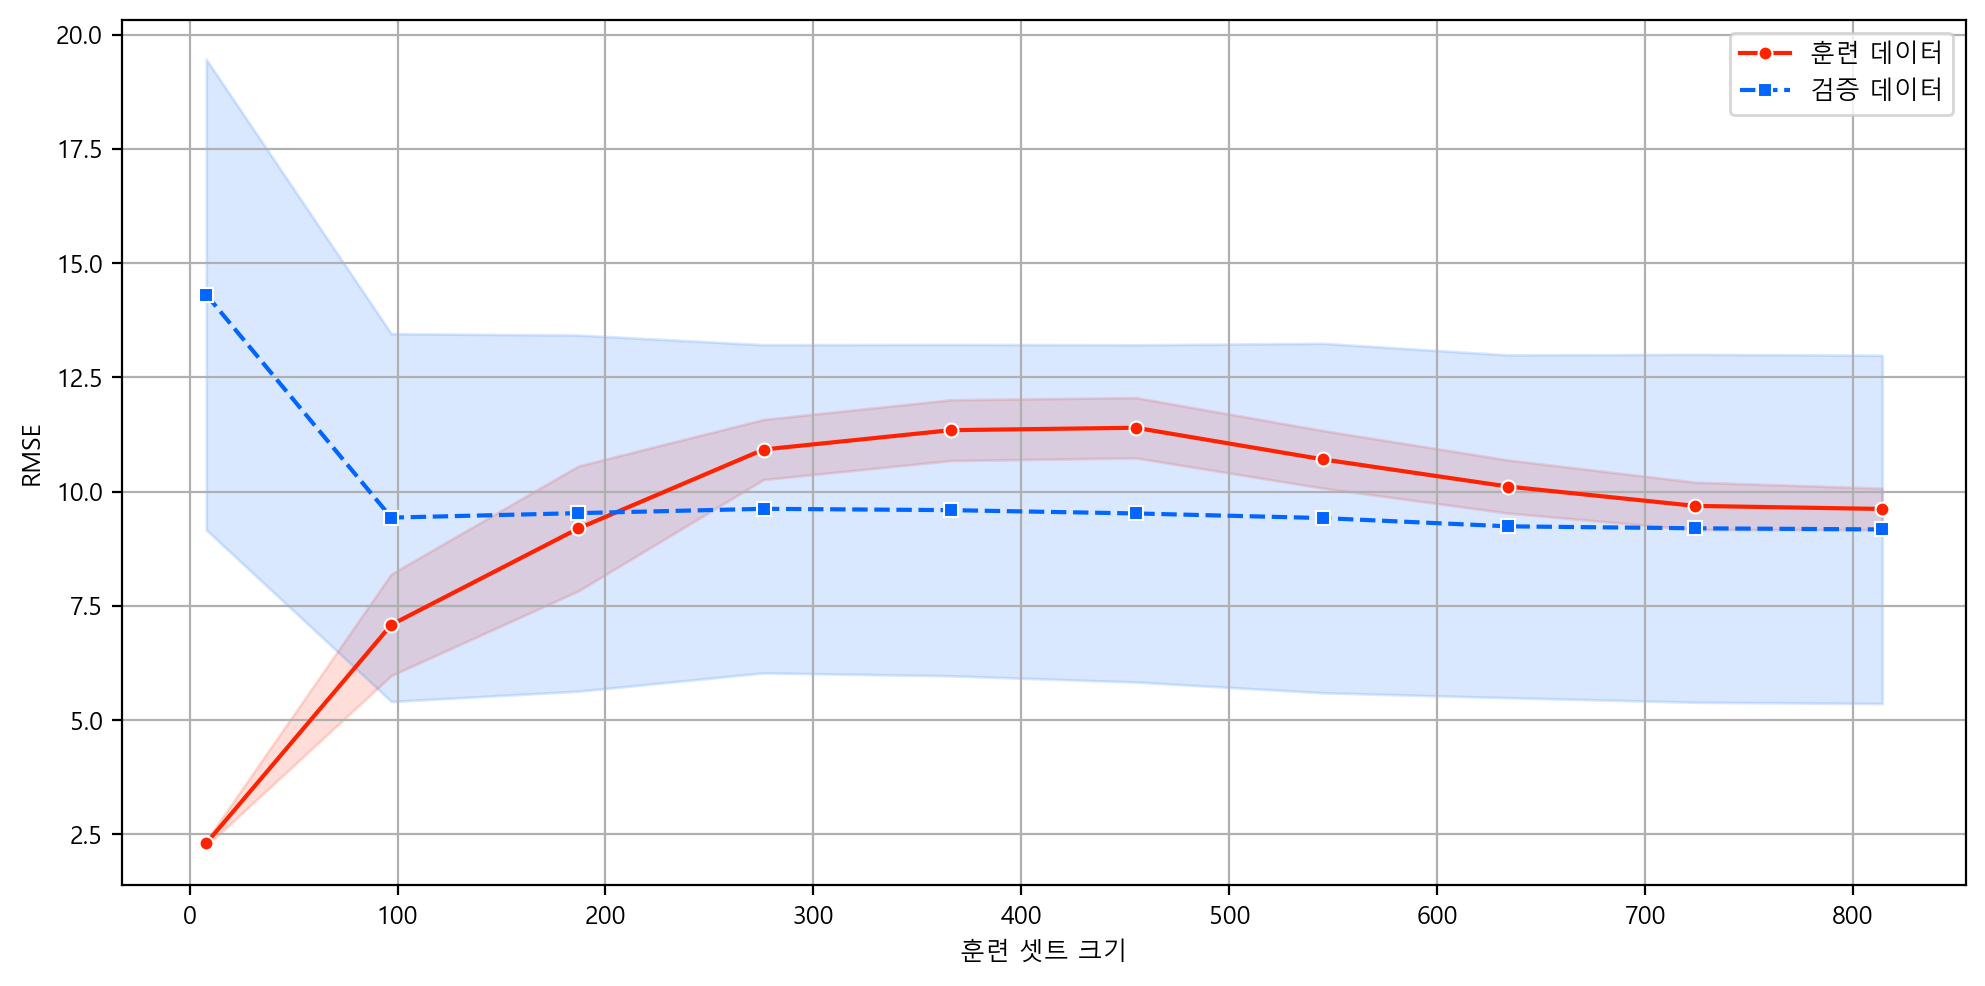

In [ ]:
my_learing_curve(fit, dummy_df.drop(ignore1,axis=1), 'price', scoring= 'RMSE')

# 과소적합